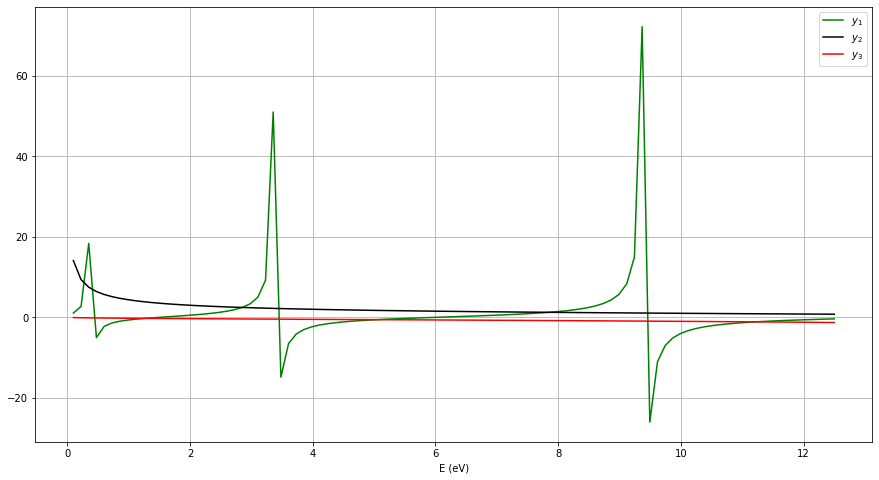

E0 =  0.3760716056823732
E1 =  1.2702059745788574
E2 =  3.3846449851989746
E3 =  5.05092191696167
E4 =  7.8506258726119995
E5 =  11.216190159320831


In [34]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

w = 1 * 10**-9 #m
V = 20 #eV
carga_e = 1.602 * 10 ** -19 #C
hBarra = sc.h / (2*np.pi) #J*s
constante = w**2 * sc.m_e / (2*hBarra**2)
nPontos = 100

E = np.linspace(0.1,12.5,nPontos) #eV , usei estes valores para não haver erros de dividir por zero
y1 = np.zeros(E.shape)
y2 = np.zeros(E.shape)
y3 = np.zeros(E.shape)

for i in range(nPontos):
    y1[i] = np.tan(np.sqrt( constante * (E[i] * carga_e) )) #verificar que não há dimensões dentro do tan()
    y2[i] = np.sqrt((V-E[i]) / E[i])
    y3[i] = - np.sqrt(E[i] / (V-E[i]))

plt.figure(figsize=(15,8))
plt.plot(E, y1, "g")
plt.plot(E, y2, "k")
plt.plot(E, y3, "r")
plt.legend(("$y_1$","$y_2$","$y_3$"))
plt.xlabel('E (eV)')
plt.grid()
plt.show()

precisao = 10**-6 #eV
def Bissect(x1,x2 , nivelE):
    def f(x): # Não esquecer de adaptar a função ao que é preciso
        if nivelE%2 == 0:
            return np.tan(np.sqrt( constante * (x * carga_e) ))  -  np.sqrt((V-x) / x) 
        else:
            return np.tan(np.sqrt( constante * (x * carga_e) ))  -  (- np.sqrt(x / (V-x)) )
    
    if f(x1) * f(x2) <= 0 :
        while abs(x1-x2) > precisao:
            x_med = (x1+x2) / 2
            if f(x_med) * f(x1) > 0:
                x1 = x_med
            else:
                x2 = x_med
        return (x1+x2) / 2 
    else:
        return "Arranja funções ou valores de jeito faz favore"
    
print('E0 = ', Bissect( 0.33, 0.5 , 0))    
print('E1 = ', Bissect( 1.0, 1.5 , 1 ))
print('E2 = ', Bissect( 3.0, 4.0, 2))
print('E3 = ', Bissect( 5.0, 6.0 , 3))
print('E4 = ', Bissect( 7.5, 9.0 , 4))
print('E5 = ', Bissect( 10.0, 12.5 , 5))

# print('E0 = ', Bissect( 0.1, 0.33 , 0))    
# print('E1 = ', Bissect( 0.33, 0.4 , 1 ))
# print('E2 = ', Bissect( 0.75, 2, 2))
# print('E3 = ', Bissect( 5.0, 6.0 , 3))
# print('E4 = ', Bissect( 7.5, 9.0 , 4))
# print('E5 = ', Bissect( 10.0, 12.5 , 5))